In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing dataset
lead = pd.read_csv(r'D:\Leads scoring Assignment\Leads.csv')

In [4]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#inspect various aspects of the dataset
lead.shape

(9240, 37)

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are many null figures in many columns. We'll be dealing with this below

In [7]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#checking for duplicate values in the dataset
lead_2 = lead.copy()

In [9]:
lead_2.drop_duplicates(inplace=True)

In [10]:
lead_2.shape

(9240, 37)

The duplicate dataset created has the same number of rowns and columns after dropping duplicates. This indicates there were no duplicates found in the dataset

In [11]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Cleaning

In [12]:
#dropping Lead Number and Prospect ID since they have all unique values
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [13]:
#Treating 'Select' values by converting them to NaN.

lead = lead.replace('Select', np.nan)

In [14]:
#checking null values

lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
# Checking the percentage of null values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [16]:
# Removing all the columns that have above 35% null values
lead = lead.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education', 'Specialization','City'],axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,No,Modified


In [17]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Analysing null values in each column separately

In [18]:
#Analysing country coumn which has almost 27% null values
lead.Country.value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Kuwait                     4
Germany                    4
Canada                     4
South Africa               4
Sweden                     3
Belgium                    2
Asia/Pacific Region        2
Ghana                      2
Italy                      2
Bangladesh                 2
Philippines                2
China                      2
Uganda                     2
Netherlands                2
Tanzania                   1
Malaysia                   1
Kenya                      1
Russia                     1
Vietnam                    1
Liberia       

In [19]:
#checking percentage of India in Country column
country_percent = round(100*len(lead[lead['Country'] == 'India'])/len(lead['Country']),2)
print(country_percent)

70.26


In [20]:
#Since India takes 70% of the column and we also have around 27% null values, it shows the data in this column is imbalanced
#Hence we can go ahead and drop this column

lead = lead.drop(['Country'], axis=1)

In [21]:
#Analysing 'What is your current occupation' coumn which has almost 30% null values
lead['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
#We need thic column further in our analaysis, and hence we replace the null values with 'Info not available'

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Info not available')

In [23]:
#Analysing 'What matters most to you in choosing a course' column which has almost 30% null values
lead['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
#checking percentage of 'Better career prospects' in this column
matters_most_percent = round(100*len(lead[lead['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(lead['What matters most to you in choosing a course']),2)
print(matters_most_percent)

70.65


In [25]:
# Since 'Better Career Prospects' occurs around 70% of times in the What matters most to you in choosing a course column, and
#also the column also has around 29% null values, we shall drop the column
lead = lead.drop(['What matters most to you in choosing a course'], axis=1)

In [26]:
# check for percentage of null values in each column

nullvalues_percent = round(100*(lead.isnull().sum()/len(lead.index)), 2)
print(nullvalues_percent)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Content                   0.00
I agree to pay the a

In [27]:
# Check the value counts for the column Total visits

lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [28]:
#since it is a numerical column, we can impute the null values with the median
lead['TotalVisits'].median()

3.0

In [29]:
lead['TotalVisits'] = lead['TotalVisits'].replace(np.nan, lead['TotalVisits'].median())

In [30]:
lead['Page Views Per Visit'].value_counts(dropna = False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.45       1
1.64       1
1.21       1
2.14       1
3.83       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [31]:
#Treating it the same way as TotalVisits column, imputing the null values with median
lead['Page Views Per Visit'].median()

2.0

In [32]:
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].replace(np.nan, lead['Page Views Per Visit'].median())

In [33]:
#Analysing the column Last Activity

lead['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [34]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Not Sure')

In [35]:
#Analysing the Lead Source column
lead['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
youtubechannel          1
Pay per Click Ads       1
welearnblog_Home        1
testone                 1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [36]:
# We can notice that Google appears twice because of different cases. Hence we will convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')

In [37]:
# check for percentage of null values in each column

nullvalues_percent = round(100*(lead.isnull().sum()/len(lead.index)), 2)
print(nullvalues_percent)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque

We have now arrived at a dataset with zero null values

In [38]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,No,No,No,No,No,No,No,No,No,Modified


In [39]:
# The following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

lead = lead.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [40]:
lead.shape

(9240, 18)

#### Outlier Treatment

In [41]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


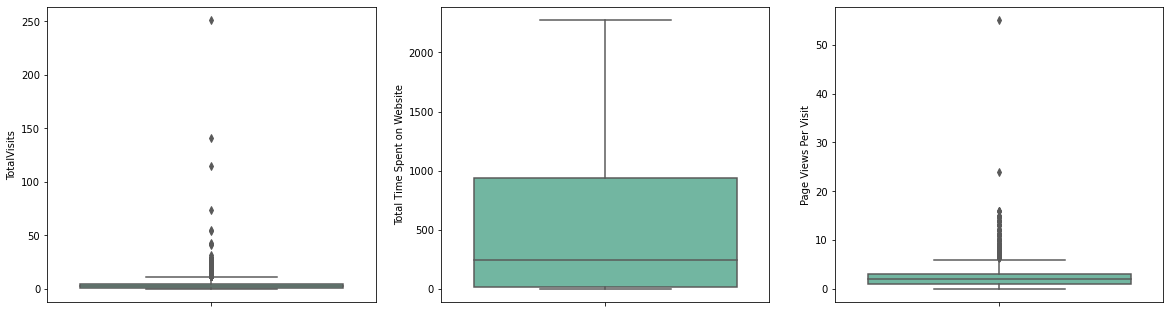

In [42]:
# Visualizing outliers in all the numeric columns using box plot

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set2', data = lead)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set2', data = lead)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set2', data = lead)
plt.show()


In [43]:
#We notice that the 'TotalVisits' column and 'Page Views Per Visit' column have outliers to be treated

In [44]:
# Removing values beyond 99% for Total Visits

total_visits_outlier = lead['TotalVisits'].quantile(0.99)
lead = lead[lead["TotalVisits"] < total_visits_outlier]
lead["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [45]:
# Removing values beyond 99% for page Views Per Visit

page_visits_outlier = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead["Page Views Per Visit"] < page_visits_outlier]
lead["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [46]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000
mean,0.385092,3.087164,483.133016,2.226383
std,0.486644,2.801244,547.420675,1.823395
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,1.000000
50%,0.000000,3.000000,245.000000,2.000000
75%,1.000000,4.000000,929.000000,3.000000
90%,1.000000,7.000000,1378.000000,5.000000
95%,1.000000,8.000000,1558.000000,6.000000
99%,1.000000,13.000000,1839.720000,7.000000


### Data Analysis - EDA

##### Analysing categorical columns based on their conversion rates

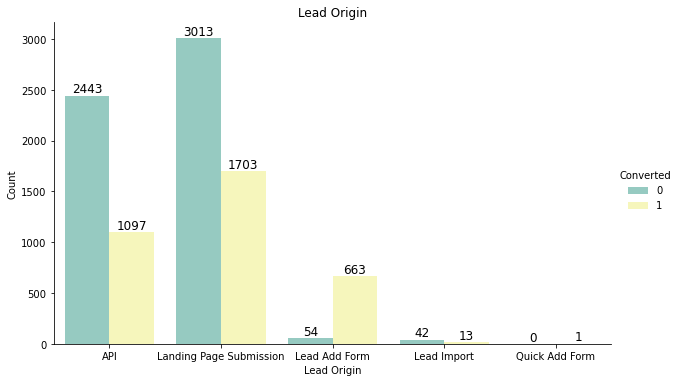

In [47]:

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead, palette="Set3", aspect= 1.7);

plt.title('Lead Origin' , fontsize = 12)
plt.xlabel("Lead Origin", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

The conversion number is higher if the Lead Origin is through 'API' and "Landing Page submission". We can also see that the people getting converted through 'Lead Add form' are more prominent that those not getting converted.

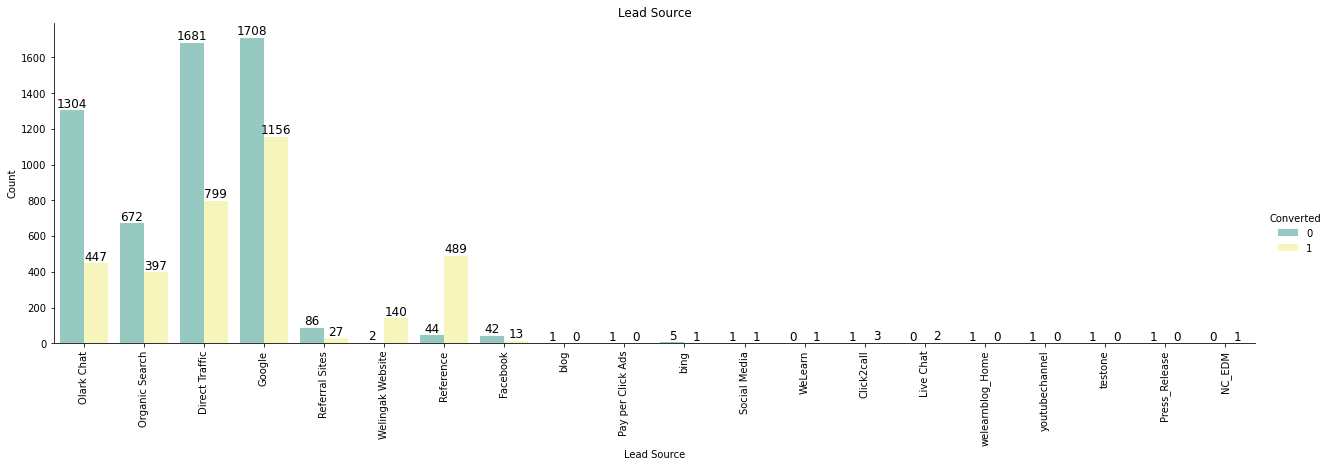

In [48]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead, palette="Set3", aspect = 3.5);

plt.title('Lead Source', fontsize = 12)
plt.xlabel("Lead Source", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
   
plt.show()


The conversion number in the lead source is higher through 'Google' and 'Direct Traffic'. We can als see almost maximum of the Lead source through 'Reference' and 'Wellingak Website' have converted.

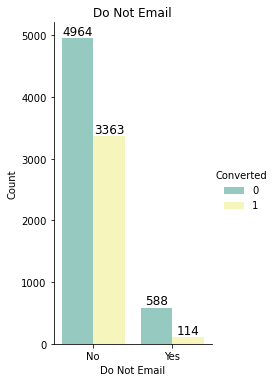

In [49]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead, palette="Set3", aspect = 0.6);

plt.title('Do Not Email', fontsize = 12)
plt.xlabel("Do Not Email", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

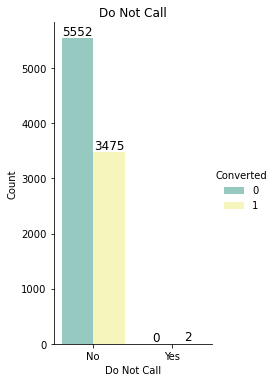

In [50]:
#Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead, palette="Set3", aspect = 0.6);

plt.title('Do Not Call', fontsize = 12)
plt.xlabel("Do Not Call", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()


Based on the above graphs, major conversion has happend from the emails that have been sent and the calls made.

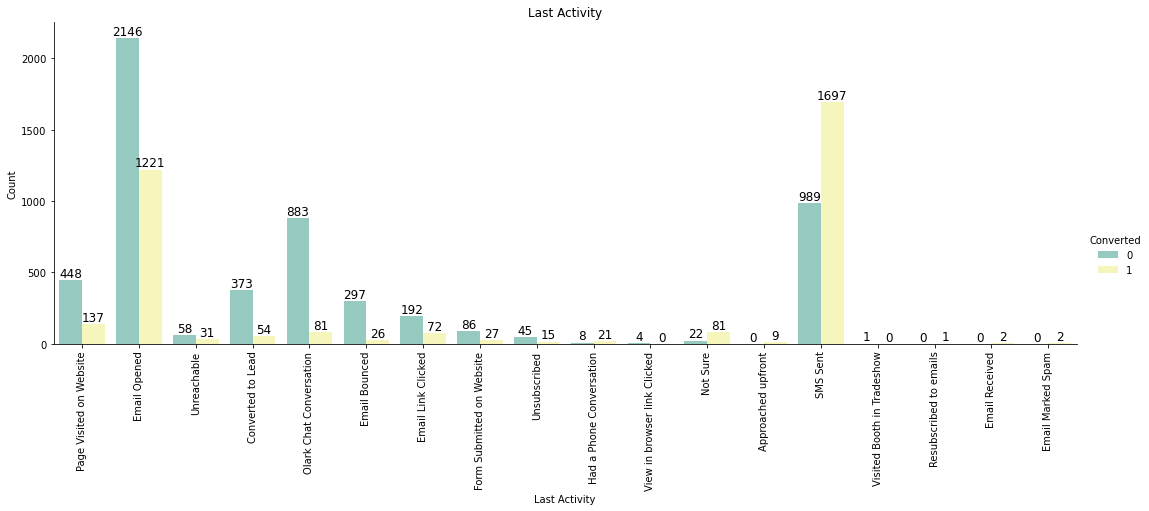

In [51]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead, palette="Set3", aspect = 3.0);

plt.title('Last Activity', fontsize = 12)
plt.xlabel("Last Activity", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

As per the above graph, last activity value of 'SMS sent' had the most conversion rate.

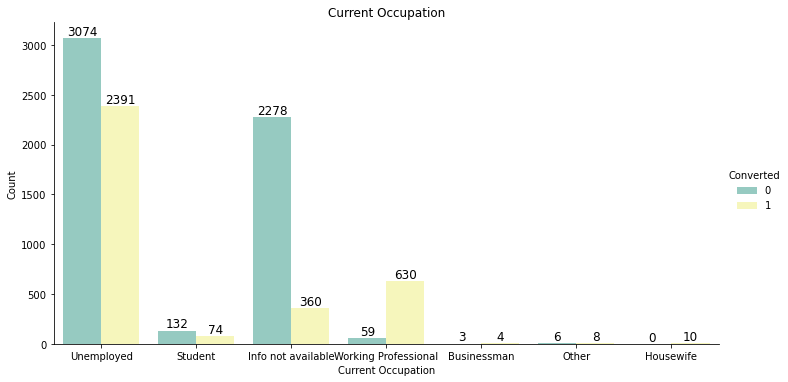

In [52]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead, palette="Set3", 
                   aspect = 2.0);

plt.title('Current Occupation', fontsize = 12)
plt.xlabel("Current Occupation", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that most working professional leads convertes.
We also noted 

- Out of 7 business men, 4 got converted
- Out 10 housewives, all 10 leads got converted.

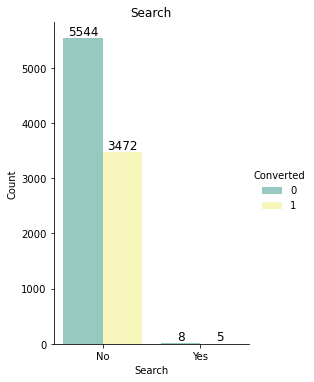

In [53]:

# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=lead, palette="Set3", aspect = 0.7);

plt.title('Search', fontsize = 12)
plt.xlabel("Search", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

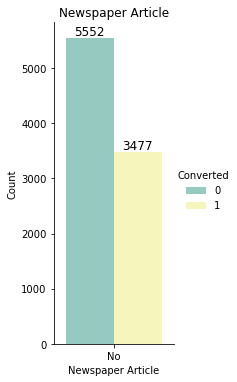

In [54]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=lead, palette="Set3", aspect = 0.5);

plt.title('Newspaper Article', fontsize = 12)
plt.xlabel("Newspaper Article", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search. 

Newspaper Article column has only one variable so we'll be dropping this column.

In [55]:

# Dropping Newspaper Article

lead = lead.drop(['Newspaper Article'], axis=1)

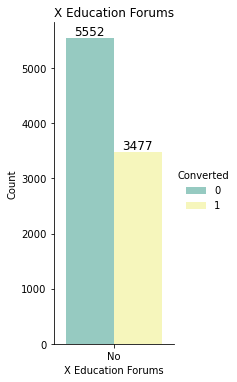

In [56]:

# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=lead, palette="Set3", aspect = 0.5);

plt.title('X Education Forums', fontsize = 12)
plt.xlabel("X Education Forums", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

In [57]:
#Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

lead = lead.drop(['X Education Forums'], axis=1)

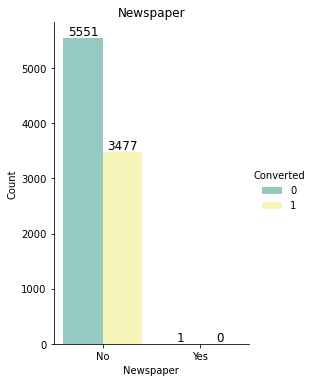

In [58]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=lead, palette="Set3", aspect = 0.7);

plt.title('Newspaper', fontsize = 12)
plt.xlabel("Newspaper", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [59]:

# Dropping Newspaper column

lead = lead.drop(['Newspaper'], axis=1)

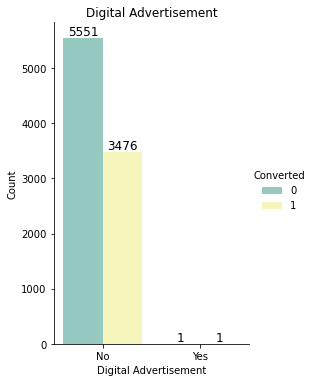

In [60]:

# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=lead, palette="Set3", aspect = 0.7);

plt.title('Digital Advertisement', fontsize = 12)
plt.xlabel("Digital Advertisement", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted.

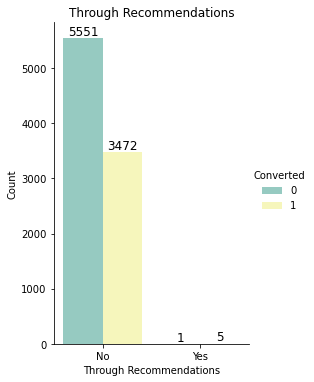

In [61]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=lead, palette="Set3", aspect = 0.7);

plt.title('Through Recommendations', fontsize = 12)
plt.xlabel("Through Recommendations", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Most leads that came through recommendations have been converted. We can also see that huge number of leads that were not through recommendations were also converted

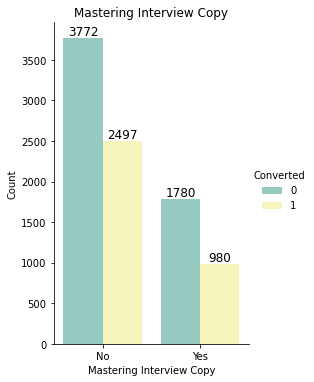

In [62]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead, palette="Set3",
                   aspect = 0.7);

plt.title('Mastering Interview Copy', fontsize = 12)
plt.xlabel("Mastering Interview Copy", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

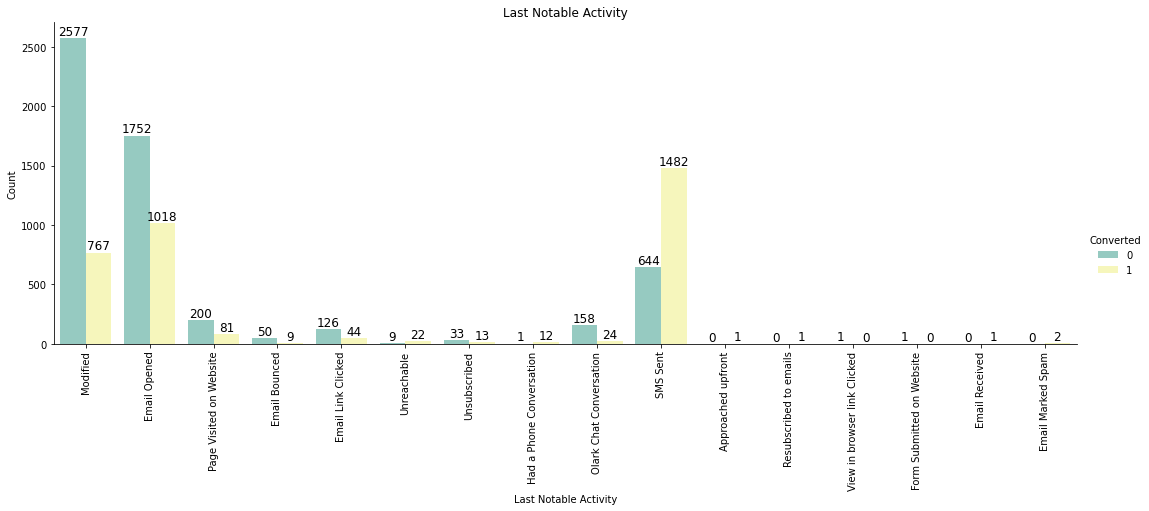

In [63]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=lead, palette="Set3", aspect = 3.0);

plt.title('Last Notable Activity', fontsize = 12)
plt.xlabel("Last Notable Activity", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()


It can be noticed that the conversion rate is high for "SMS Sent" and also a high number of people who opened the emails got converted

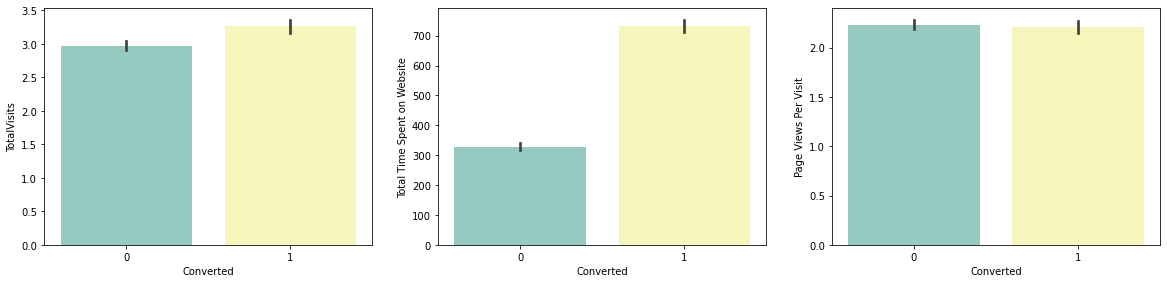

In [64]:
#checking conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set3', data = lead)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set3', data = lead)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set3', data = lead)
plt.show()

The conversion rates were higher for Total Visits, Total Time Spent on Website and Page Views Per Visit

### Dealing Categorical Variables - Creating Dummies

In [65]:
#Mapping to 0 and 1 for columns with yes or no
variablelist = ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead[variablelist] = lead[variablelist].apply(binary_map)

In [66]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9029 non-null   object 
 1   Lead Source                             9029 non-null   object 
 2   Do Not Email                            9029 non-null   int64  
 3   Do Not Call                             9029 non-null   int64  
 4   Converted                               9029 non-null   int64  
 5   TotalVisits                             9029 non-null   float64
 6   Total Time Spent on Website             9029 non-null   int64  
 7   Page Views Per Visit                    9029 non-null   float64
 8   Last Activity                           9029 non-null   object 
 9   What is your current occupation         9029 non-null   object 
 10  Search                                  9029 non-null   int6

In [67]:
# Creating dummies for the following columns below 

d_lead_origin = pd.get_dummies(lead['Lead Origin'], prefix='LeadOrigin')
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
lead = pd.concat([lead, d_lead_origin1], axis = 1)

d_lead_source = pd.get_dummies(lead['Lead Source'], prefix='LeadSource')
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
lead = pd.concat([lead,d_lead_source1], axis=1)

d_last_activity = pd.get_dummies(lead['Last Activity'], prefix='LastActivity')
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
lead = pd.concat([lead,d_last_activity1], axis=1)

d_curr_occupation = pd.get_dummies(lead['What is your current occupation'], prefix='CurrentOccupation')
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
lead = pd.concat([lead,d_curr_occupation1], axis=1)


d_last_notable_activity = pd.get_dummies(lead['Last Notable Activity'], prefix='LastNotableActivity')
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
lead = pd.concat([lead,d_last_notable_activity1], axis=1)

lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [68]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [69]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [70]:
lead.shape

(9029, 71)

### Test - Train Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# Putting response variable to y
y = lead['Converted']

y.head()

X=lead.drop('Converted', axis=1)

In [73]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6320 entries, 5493 to 5760
Data columns (total 70 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      6320 non-null   int64  
 1   Do Not Call                                       6320 non-null   int64  
 2   TotalVisits                                       6320 non-null   float64
 3   Total Time Spent on Website                       6320 non-null   int64  
 4   Page Views Per Visit                              6320 non-null   float64
 5   Search                                            6320 non-null   int64  
 6   Digital Advertisement                             6320 non-null   int64  
 7   Through Recommendations                           6320 non-null   int64  
 8   A free copy of Mastering The Interview            6320 non-null   int64  
 9   LeadOrigin_API  

In [75]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
5493,-0.290871,0.0,-0.394290,-0.708153,-0.135234,-0.039809,-0.01258,-0.025166,1.504253,0,...,0,0,0,1,0,0,0,0,0,0
8064,-0.290871,0.0,-0.039721,-0.711823,0.410454,-0.039809,-0.01258,-0.025166,-0.664782,1,...,0,0,0,1,0,0,0,0,0,0
4716,3.437946,0.0,-0.039721,-0.471434,0.410454,-0.039809,-0.01258,-0.025166,1.504253,0,...,0,0,0,1,0,0,0,0,0,0
9117,-0.290871,0.0,-1.103429,-0.884316,-1.226608,-0.039809,-0.01258,-0.025166,-0.664782,1,...,0,0,0,0,0,0,0,0,0,0
2402,-0.290871,0.0,1.023987,0.704822,-0.135234,-0.039809,-0.01258,-0.025166,-0.664782,0,...,0,0,0,0,0,0,0,0,0,0


##### Model Building

In [76]:
import statsmodels.api as sm

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(lr, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [78]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False])

In [79]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 23),
 ('Do Not Call', False, 55),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Search', False, 51),
 ('Digital Advertisement', False, 46),
 ('Through Recommendations', False, 38),
 ('A free copy of Mastering The Interview', False, 50),
 ('LeadOrigin_API', False, 11),
 ('LeadOrigin_Landing Page Submission', False, 10),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 36),
 ('LeadSource_Click2call', False, 15),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Facebook', False, 7),
 ('LeadSource_Google', False, 3),
 ('LeadSource_Live Chat', False, 43),
 ('LeadSource_Olark Chat', False, 12),
 ('LeadSource_Organic Search', True, 1),
 ('LeadSource_Pay per Click Ads', False, 54),
 ('LeadSource_Press_Release', False, 49),
 ('LeadSource_Reference', False, 32),
 ('LeadSource_Referral Sites', False, 2),
 ('LeadSource_Social Media', False, 17),
 ('LeadSource_WeLearn', False,

In [80]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'LeadOrigin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Organic Search',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Email Bounced', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Info not available',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [81]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Import',
       'LeadSource_Click2call', 'LeadSource_Facebook', 'LeadSource_Google',
       'LeadSource_Live Chat', 'LeadSource_Olark Chat',
       'LeadSource_Pay per Click Ads', 'LeadSource_Press_Release',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Social Media', 'LeadSource_WeLearn', 'LeadSource_bing',
       'LeadSource_blog', 'LeadSource_testone', 'LeadSource_welearnblog_Home',
       'LeadSource_youtubechannel', 'LastActivity_Converted to Lead',
       'LastActivity_Email Link Clicked', 'LastActivity_Email Marked Spam',
       'LastActivity_Email Opened', 'LastActivity_Email Received',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Had a Phone Conversa

In [82]:
#Model Building #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.1
Date:                Mon, 17 May 2021   Deviance:                       5204.1
Time:                        18:29:50   Pearson chi2:                 6.34e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.4114      0.064     -6.444      0.000      -0.537      -0.286
Total Time Spent on Website                      0.9550      0.036     26.469      0.000       0.884       1.026
LeadOrigin_Lead Add Form                         2.8381      0.199     14.282      0.000       2.449       3.228
LeadSource_Direct Traffic                       -0.7204      0.082     -8.779      0.000      -0.881      -0.560
LeadSource_Organic Search                       -0.5578      0.109     -5.111      0.000      -0.772      -0.344
LeadSource_Welingak Website                      2.0842      0.744      2.801      0.005       0.626       3.543
LastActivity_Approached upfront                 23.7860   2.44e+04      0.001      0.999   -4.78e+04    4.78e+04
LastActivity_Email Bounced                      -1.2442      0.303     -4.108      0.000      -1.838      -0.651
LastActivity_SMS Sent                            1.2263      0.075     16.368      0.000       1.079       1.373
CurrentOccupation_Housewife                     23.9037   2.84e+04      0.001      0.999   -5.56e+04    5.57e+04
CurrentOccupation_Info not available            -1.1525      0.087    -13.200      0.000      -1.324      -0.981
CurrentOccupation_Working Professional           2.3218      0.180     12.871      0.000       1.968       2.675
LastNotableActivity_Had a Phone Conversation     2.9894      1.107      2.700      0.007       0.819       5.160
LastNotableActivity_Modified                    -0.9787      0.079    -12.336      0.000      -1.134      -0.823
LastNotableActivity_Olark Chat Conversation     -0.9168      0.319     -2.874      0.004      -1.542      -0.292
LastNotableActivity_Unreachable                  1.4488      0.550      2.635      0.008       0.371       2.526
================================================================================================================
"""

p-value of variable LastActivity_Approached upfront is high, so we can drop it

In [83]:
#dropping column with high p-value

col = col.drop('LastActivity_Approached upfront',1)

In [84]:
#Model Building #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.8
Date:                Mon, 17 May 2021   Deviance:                       5213.7
Time:                        18:29:50   Pearson chi2:                 6.35e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.4103      0.064     -6.429      0.000      -0.535      -0.285
Total Time Spent on Website                      0.9560      0.036     26.518      0.000       0.885       1.027
LeadOrigin_Lead Add Form                         2.8510      0.198     14.379      0.000       2.462       3.240
LeadSource_Direct Traffic                       -0.7195      0.082     -8.776      0.000      -0.880      -0.559
LeadSource_Organic Search                       -0.5532      0.109     -5.078      0.000      -0.767      -0.340
LeadSource_Welingak Website                      2.0676      0.744      2.779      0.005       0.610       3.526
LastActivity_Email Bounced                      -1.2534      0.303     -4.136      0.000      -1.847      -0.659
LastActivity_SMS Sent                            1.2229      0.075     16.327      0.000       1.076       1.370
CurrentOccupation_Housewife                     22.8962   1.72e+04      0.001      0.999   -3.37e+04    3.38e+04
CurrentOccupation_Info not available            -1.1566      0.087    -13.253      0.000      -1.328      -0.986
CurrentOccupation_Working Professional           2.3165      0.180     12.846      0.000       1.963       2.670
LastNotableActivity_Had a Phone Conversation     2.9891      1.108      2.699      0.007       0.818       5.160
LastNotableActivity_Modified                    -0.9680      0.079    -12.230      0.000      -1.123      -0.813
LastNotableActivity_Olark Chat Conversation     -0.9172      0.319     -2.874      0.004      -1.543      -0.292
LastNotableActivity_Unreachable                  1.4481      0.550      2.633      0.008       0.370       2.526
================================================================================================================
"""

p-value of variable CurrentOccupation_Housewife is high, so we can drop it

In [85]:
col = col.drop('CurrentOccupation_Housewife',1)

In [86]:
#Model Building #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.8
Date:                Mon, 17 May 2021   Deviance:                       5223.5
Time:                        18:29:50   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.4048      0.064     -6.350      0.000      -0.530      -0.280
Total Time Spent on Website                      0.9561      0.036     26.545      0.000       0.886       1.027
LeadOrigin_Lead Add Form                         2.8542      0.198     14.406      0.000       2.466       3.242
LeadSource_Direct Traffic                       -0.7190      0.082     -8.778      0.000      -0.880      -0.558
LeadSource_Organic Search                       -0.5440      0.109     -5.006      0.000      -0.757      -0.331
LeadSource_Welingak Website                      2.0614      0.744      2.771      0.006       0.603       3.519
LastActivity_Email Bounced                      -1.2591      0.303     -4.155      0.000      -1.853      -0.665
LastActivity_SMS Sent                            1.2170      0.075     16.259      0.000       1.070       1.364
CurrentOccupation_Info not available            -1.1606      0.087    -13.304      0.000      -1.332      -0.990
CurrentOccupation_Working Professional           2.3115      0.180     12.820      0.000       1.958       2.665
LastNotableActivity_Had a Phone Conversation     2.9840      1.108      2.694      0.007       0.813       5.155
LastNotableActivity_Modified                    -0.9691      0.079    -12.258      0.000      -1.124      -0.814
LastNotableActivity_Olark Chat Conversation     -0.9219      0.319     -2.888      0.004      -1.548      -0.296
LastNotableActivity_Unreachable                  1.4424      0.550      2.622      0.009       0.364       2.521
================================================================================================================
"""

p-value of variable LastNotableActivity_Unreachable is high, so we can drop it

In [87]:
col = col.drop('LastNotableActivity_Unreachable',1)

In [88]:
#Model Building #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.4
Date:                Mon, 17 May 2021   Deviance:                       5230.7
Time:                        18:29:50   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.3912      0.063     -6.162      0.000      -0.516      -0.267
Total Time Spent on Website                      0.9565      0.036     26.570      0.000       0.886       1.027
LeadOrigin_Lead Add Form                         2.8589      0.198     14.442      0.000       2.471       3.247
LeadSource_Direct Traffic                       -0.7250      0.082     -8.855      0.000      -0.885      -0.565
LeadSource_Organic Search                       -0.5433      0.109     -5.005      0.000      -0.756      -0.331
LeadSource_Welingak Website                      2.0514      0.744      2.758      0.006       0.593       3.509
LastActivity_Email Bounced                      -1.2651      0.303     -4.174      0.000      -1.859      -0.671
LastActivity_SMS Sent                            1.2062      0.075     16.145      0.000       1.060       1.353
CurrentOccupation_Info not available            -1.1552      0.087    -13.266      0.000      -1.326      -0.985
CurrentOccupation_Working Professional           2.3074      0.180     12.798      0.000       1.954       2.661
LastNotableActivity_Had a Phone Conversation     2.9705      1.108      2.682      0.007       0.799       5.142
LastNotableActivity_Modified                    -0.9800      0.079    -12.419      0.000      -1.135      -0.825
LastNotableActivity_Olark Chat Conversation     -0.9371      0.319     -2.937      0.003      -1.562      -0.312
================================================================================================================
"""

In [89]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,LeadOrigin_Lead Add Form,1.49
10,LastNotableActivity_Modified,1.43
7,CurrentOccupation_Info not available,1.37
6,LastActivity_SMS Sent,1.30
4,LeadSource_Welingak Website,1.29
2,LeadSource_Direct Traffic,1.27
8,CurrentOccupation_Working Professional,1.17
3,LeadSource_Organic Search,1.12
0,Total Time Spent on Website,1.10
5,LastActivity_Email Bounced,1.10


In [91]:
#Since all vif's are lesser, we drop the columnw with the non-zero p values
col = col.drop('LastNotableActivity_Olark Chat Conversation',1)

In [92]:
col = col.drop('LastNotableActivity_Had a Phone Conversation', 1)

In [93]:
#Model Building #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.3
Date:                Mon, 17 May 2021   Deviance:                       5252.6
Time:                        18:29:50   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.4094      0.062     -6.558      0.000      -0.532      -0.287
Total Time Spent on Website                0.9556      0.036     26.615      0.000       0.885       1.026
LeadOrigin_Lead Add Form                   2.8630      0.198     14.464      0.000       2.475       3.251
LeadSource_Direct Traffic                 -0.7141      0.082     -8.744      0.000      -0.874      -0.554
LeadSource_Organic Search                 -0.5349      0.108     -4.939      0.000      -0.747      -0.323
LeadSource_Welingak Website                2.0351      0.744      2.737      0.006       0.578       3.493
LastActivity_Email Bounced                -1.2588      0.303     -4.154      0.000      -1.853      -0.665
LastActivity_SMS Sent                      1.2210      0.074     16.438      0.000       1.075       1.367
CurrentOccupation_Info not available      -1.1752      0.087    -13.546      0.000      -1.345      -1.005
CurrentOccupation_Working Professional     2.3064      0.180     12.790      0.000       1.953       2.660
LastNotableActivity_Modified              -0.9643      0.079    -12.283      0.000      -1.118      -0.810
==========================================================================================================
"""

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,LeadOrigin_Lead Add Form,1.49
9,LastNotableActivity_Modified,1.42
7,CurrentOccupation_Info not available,1.33
6,LastActivity_SMS Sent,1.30
4,LeadSource_Welingak Website,1.29
2,LeadSource_Direct Traffic,1.27
8,CurrentOccupation_Working Professional,1.17
3,LeadSource_Organic Search,1.12
0,Total Time Spent on Website,1.10
5,LastActivity_Email Bounced,1.10


So the Values all seem to be in par. We move on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [95]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.059272
8064    0.059077
4716    0.090029
9117    0.221927
2402    0.565647
1796    0.032485
1120    0.032485
253     0.101822
1491    0.085483
2004    0.366402
dtype: float64

In [96]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05927233, 0.05907708, 0.09002888, 0.22192665, 0.56564694,
       0.03248548, 0.03248548, 0.10182209, 0.0854833 , 0.36640221])

In [98]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.059272,5493
1,0,0.059077,8064
2,0,0.090029,4716
3,0,0.221927,9117
4,1,0.565647,2402


In [99]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.059272,5493,0
1,0,0.059077,8064,0
2,0,0.090029,4716,0
3,0,0.221927,9117,0
4,1,0.565647,2402,1


##### Confusion matrics

In [100]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3470  439]
 [ 795 1616]]


In [101]:
#overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8047468354430379


In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
#sensitivity
TP / float(TP+FN)

0.6702613023641643

In [104]:
#specificity
TN / float(TN+FP)

0.8876950626758762

In [105]:
# positive predictive value 
print (TP / float(TP+FP))

0.786374695863747


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.813599062133646


#### Plotting ROC Curve

In [107]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

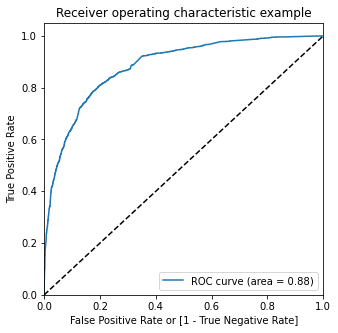

In [109]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Find Optimal Cutoff Point

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.059272,5493,0,1,0,0,0,0,0,0,0,0,0
1,0,0.059077,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.090029,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.221927,9117,0,1,1,1,0,0,0,0,0,0,0
4,1,0.565647,2402,1,1,1,1,1,1,1,0,0,0,0


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.625949  0.966819  0.415707
0.2   0.2  0.740981  0.926172  0.626759
0.3   0.3  0.791614  0.838241  0.762855
0.4   0.4  0.810443  0.782248  0.827833
0.5   0.5  0.804747  0.670261  0.887695
0.6   0.6  0.799209  0.596848  0.924021
0.7   0.7  0.781804  0.506844  0.951394
0.8   0.8  0.760759  0.419743  0.971092
0.9   0.9  0.717247  0.279552  0.987209


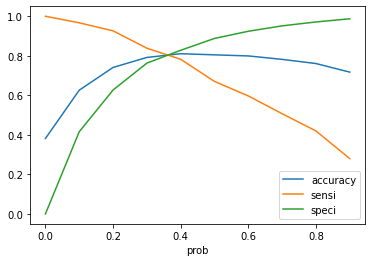

In [112]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [113]:

# Let us make the final prediction using 0.35 as the cut off

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.059272,5493,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.059077,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.090029,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.221927,9117,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.565647,2402,1,1,1,1,1,1,1,0,0,0,0,1


In [114]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,0,0.059272,5493,0,1,0,0,0,0,0,0,0,0,0,0,6
1,0,0.059077,8064,0,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.090029,4716,0,1,0,0,0,0,0,0,0,0,0,0,9
3,0,0.221927,9117,0,1,1,1,0,0,0,0,0,0,0,0,22
4,1,0.565647,2402,1,1,1,1,1,1,1,0,0,0,0,1,57
5,0,0.032485,1796,0,1,0,0,0,0,0,0,0,0,0,0,3
6,0,0.032485,1120,0,1,0,0,0,0,0,0,0,0,0,0,3
7,0,0.101822,253,0,1,1,0,0,0,0,0,0,0,0,0,10
8,0,0.085483,1491,0,1,0,0,0,0,0,0,0,0,0,0,9
9,1,0.366402,2004,0,1,1,1,1,0,0,0,0,0,0,1,37


In [115]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8026898734177215

In [116]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3118,  791],
       [ 456, 1955]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8108668602239735

In [119]:
# Let us calculate specificity
TN / float(TN+FP)

0.7976464568943464

In [121]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.20235354310565362


In [122]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7119446467589221


In [123]:
# Negative predictive value
print (TN / float(TN+ FN))

0.87241186345831


In [124]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.786374695863747

In [125]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6702613023641643

In [126]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1955
0     456
Name: final_Predicted, dtype: int64

In [127]:
# check the precentage of final_predicted conversions

1955/float(1955+456)

0.8108668602239735

###### Hence we can see that the final prediction of conversions have a target of 81% conversion as per the X Educations CEO's requirement . Hence this is a good model.

#### Precision and Recall Trade Off

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

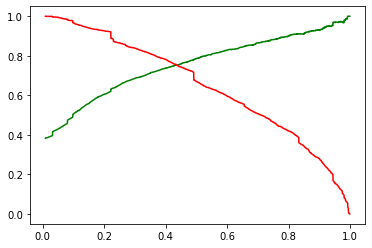

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [131]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
4664,-0.289137,-0.027181,-1.099586,-0.878776,-1.208743,-0.033296,-0.019217,-0.027181,-0.660586,1,...,0,0,0,0,0,0,0,0,0,0
5394,-0.289137,-0.027181,0.352414,-0.582229,-0.470067,-0.033296,-0.019217,-0.027181,-0.660586,1,...,0,0,0,1,0,0,0,0,0,0
1595,-0.289137,-0.027181,0.352414,1.238640,1.012839,-0.033296,-0.019217,-0.027181,-0.660586,0,...,0,0,0,1,0,0,0,0,0,0
2111,-0.289137,-0.027181,1.441414,0.065110,2.679026,-0.033296,-0.019217,-0.027181,1.513808,0,...,0,0,0,0,0,0,0,0,0,0
9182,-0.289137,-0.027181,-1.099586,-0.878776,-1.208743,-0.033296,-0.019217,-0.027181,-0.660586,1,...,0,0,0,1,0,0,0,0,0,0


In [132]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Organic Search,LeadSource_Welingak Website,LastActivity_Email Bounced,LastActivity_SMS Sent,CurrentOccupation_Info not available,CurrentOccupation_Working Professional,LastNotableActivity_Modified
4664,-0.878776,0,0,0,0,0,0,0,0,0
5394,-0.582229,0,0,0,0,0,0,1,0,1
1595,1.238640,0,0,1,0,0,0,0,1,1
2111,0.065110,0,1,0,0,0,0,1,0,0
9182,-0.878776,0,0,0,0,0,1,0,0,1


In [133]:
X_test_sm = sm.add_constant(X_test)

##### Prediction on Test Set

In [134]:
y_test_pred = res.predict(X_test_sm)

In [135]:
y_test_pred[:10]

4664    0.222842
5394    0.042891
1595    0.829416
2111    0.096522
9182    0.270422
1055    0.724520
541     0.148862
446     0.984886
3728    0.020677
4249    0.033931
dtype: float64

In [136]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [137]:
# Let's see the head
y_pred_1.head()

,0
4664,0.222842
5394,0.042891
1595,0.829416
2111,0.096522
9182,0.270422


In [138]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [139]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [142]:
y_pred_final.head()

,Converted,Prospect ID,0
4664,0,4664,0.222842
5394,0,5394,0.042891
1595,1,1595,0.829416
2111,0,2111,0.096522
9182,0,9182,0.270422


In [143]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [144]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
4664,0,4664,0.222842
5394,0,5394,0.042891
1595,1,1595,0.829416
2111,0,2111,0.096522
9182,0,9182,0.270422


In [145]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [146]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
4664,4664,0,0.222842,22
5394,5394,0,0.042891,4
1595,1595,1,0.829416,83
2111,2111,0,0.096522,10
9182,9182,0,0.270422,27


In [147]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [148]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
4664,4664,0,0.222842,22,0
5394,5394,0,0.042891,4,0
1595,1595,1,0.829416,83,1
2111,2111,0,0.096522,10,0
9182,9182,0,0.270422,27,0


In [149]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7947582133628646

In [150]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1285,  358],
       [ 198,  868]], dtype=int64)

In [151]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8142589118198874

In [153]:
# Let us calculate specificity
TN / float(TN+FP)

0.7821059038344492

In [157]:
##### Precision
TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7079934747145188

In [158]:
##### Recall
TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8142589118198874

In [ ]:
Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 80.2%
Sensitivity : 81.0%
Specificity : 79.76%
Test Data: 
Accuracy : 79.4%
Sensitivity : 81.4%
Specificity : 78.2%
